## Importing libraries

In [1]:
import pandas as pd       # data processing
import numpy as np        # Linear algebra
import matplotlib.pyplot as plt    # data visualisation
import seaborn as sns              # data visualisation
from shapely.geometry import Polygon, Point    # geospatial data analysis

import warnings
warnings.filterwarnings(action='ignore')
plt.style.use('fivethirtyeight')

## Importing the dataset

In [2]:
data = pd.read_csv('nyc_taxi_trip_duration.csv')

## First look on data

In [3]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
data.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447
729321,id1053441,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.003342,40.743839,-73.945847,40.712841,N,1224


In [5]:
data.shape

(729322, 11)

Totally our dataset has 729322 rides with 11 columns

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


From above can confirm there are no missing values. Columns like store_and_fwd_flag should be converted to categorical values and pickup, dropoff datetime variables should be in datetime format instead of object which gives the advantage of extracting information from that.

Let's check the data files! According the data description we should find the following columns:

In [7]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

Lets see what each column mean

- id - a unique identifier for each trip
- vendor_id - a code indicating the provider associated with the trip record
- pickup_datetime - date and time when the meter was engaged
- dropoff_datetime - date and time when the meter was disengaged
- passenger_count - the number of passengers in the vehicle (driver entered value)
- pickup_longitude - the longitude where the meter was engaged
- pickup_latitude - the latitude where the meter was engaged
- dropoff_longitude - the longitude where the meter was disengaged
- dropoff_latitude - the latitude where the meter was disengaged
- store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)
- trip_duration - duration of the trip in seconds

Before analysing, lets convert the necessary column to their respective dtypes

In [8]:
data['pickup_datetime'] = pd.to_datetime(data.pickup_datetime)
data['dropoff_datetime'] = pd.to_datetime(data.dropoff_datetime)
data['vendor_id'] = data['vendor_id'].astype('category')
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].astype('category')

In [9]:
data.dtypes

id                            object
vendor_id                   category
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                  int64
dtype: object

## Describing the data

In [10]:
data.describe()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


- **vendor_id**  -  vendor_id is a categorical variable with only 2 values (0 and 1).
- **passenger_count**   -   Its range is from 0 to 9. Minimum value looks fishy. It can be a outlier and need to handle it.
- **pickup_longitude** and **dropoff_longitude**  -  City's border limit is between -74.03 and -73.75 
- **pickup_latitude** and **dropoff_latitude**  -  City's border limit is between 40.63 and  40.85 . So need to handle it too
- **trip_duration**  -  Minimum trip duration is 1 second, those trips are going nowhere and maximum is 1939736 seconds. That's total of 538.8 hours. Nobody travels that long in taxi. So need to remove those outliers.

## Feature creation

In [11]:
data.loc[:, 'hour'] = data['pickup_datetime'].dt.hour
data.loc[:, 'day_of_week'] = data['pickup_datetime'].dt.dayofweek
data['day_type'] = 'weekends'
data['day_type'][data['pickup_datetime'].dt.day_of_week<5] = 'weekdays'
data['day_type'] = data['day_type'].astype('category')
data['day_of_week'] = data['day_of_week'].astype('category')

In [12]:
hour_bins = [0, 6, 12, 16, 23, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening', 'Night']
data['Session'] = pd.cut(data.hour,bins=hour_bins, right=False, labels=labels, ordered=False)

In [13]:
def haversine(lat1, lng1, lat2, lng2):
    """function to calculate haversine distance between two co-ordinates"""
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return(h)

data.loc[:, 'distance'] = haversine(data['pickup_latitude'], data['pickup_longitude'], data['dropoff_latitude'], data['dropoff_longitude'])

In [14]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,hour,day_of_week,day_type,Session,distance
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,16,0,weekdays,Evening,1.199073
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,23,4,weekdays,Night,4.129111
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,17,6,weekends,Evening,7.250753
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,9,1,weekdays,Morning,2.361097
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,6,2,weekdays,Morning,4.328534


## Analysing the variables - Univariate analysis

### Numerical variables

#### Trip_duration

It will be better to have durations in terms of minutes rather than in seconds since it gives better interpretation

In [15]:
data['trip_duration(min)'] = data['trip_duration']/60.0
data['trip_duration(min)'].describe()

count    729322.000000
mean         15.870486
std          64.410437
min           0.016667
25%           6.616667
50%          11.050000
75%          17.916667
max       32328.933333
Name: trip_duration(min), dtype: float64

In [11]:
pd.cut(data['trip_duration(min)'],bins=100).value_counts()

(-32.312, 323.306]        728310
(1293.173, 1616.462]         929
(323.306, 646.595]            41
(969.884, 1293.173]           22
(646.595, 969.884]            19
                           ...  
(11315.138, 11638.427]         0
(10991.848, 11315.138]         0
(10668.559, 10991.848]         0
(10345.27, 10668.559]          0
(16164.475, 16487.764]         0
Name: trip_duration(min), Length: 100, dtype: int64

From the above cells, can see that till 3rd quartile durations are in acceptable range. Can confirm the same through plot

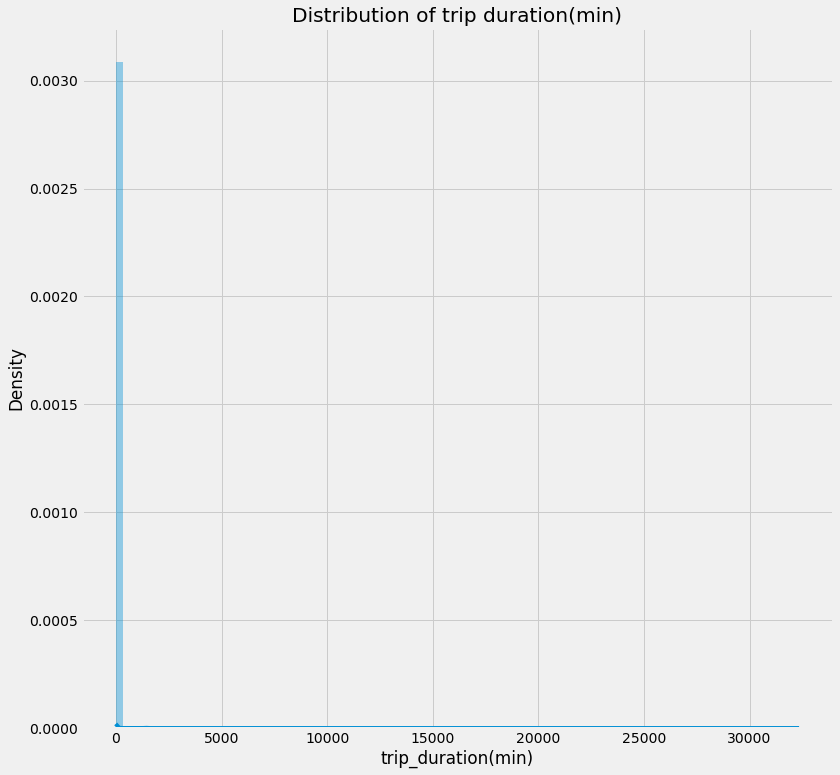

In [12]:
plt.figure(figsize=(12,12))
sns.distplot(data['trip_duration(min)'], bins=100)
plt.title('Distribution of trip duration(min)')
plt.show()

On visualising the plot in normal scale, we don't clearly see the less dense trips and also our trip_duration is right skewed, can apply log transformation and check if the distribution is normal.

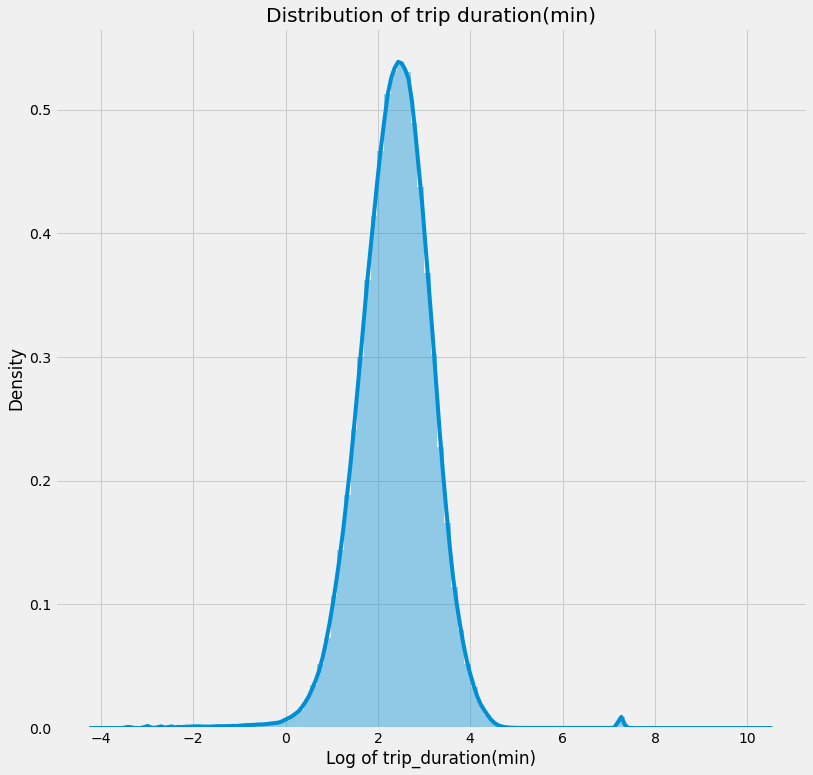

In [13]:
plt.figure(figsize=(12,12))
sns.distplot(np.log(data['trip_duration(min)']), bins=100)
plt.xlabel('Log of trip_duration(min)')
plt.title('Distribution of trip duration(min)')
plt.show()

It is clear that trip-durations are normal and few trips have very large duration like 32538 mins which can be seen by a small bump at the right side.

#### Latitudes and Longitudes

In [14]:
xlim = [-74.03, -73.77]
ylim = [40.63, 40.85]
data = data[(data.pickup_longitude> xlim[0]) & (data.pickup_longitude < xlim[1])]
data = data[(data.dropoff_longitude> xlim[0]) & (data.dropoff_longitude < xlim[1])]
data = data[(data.pickup_latitude> ylim[0]) & (data.pickup_latitude < ylim[1])]
data = data[(data.dropoff_latitude> ylim[0]) & (data.dropoff_latitude < ylim[1])]
data.reset_index(inplace=True)

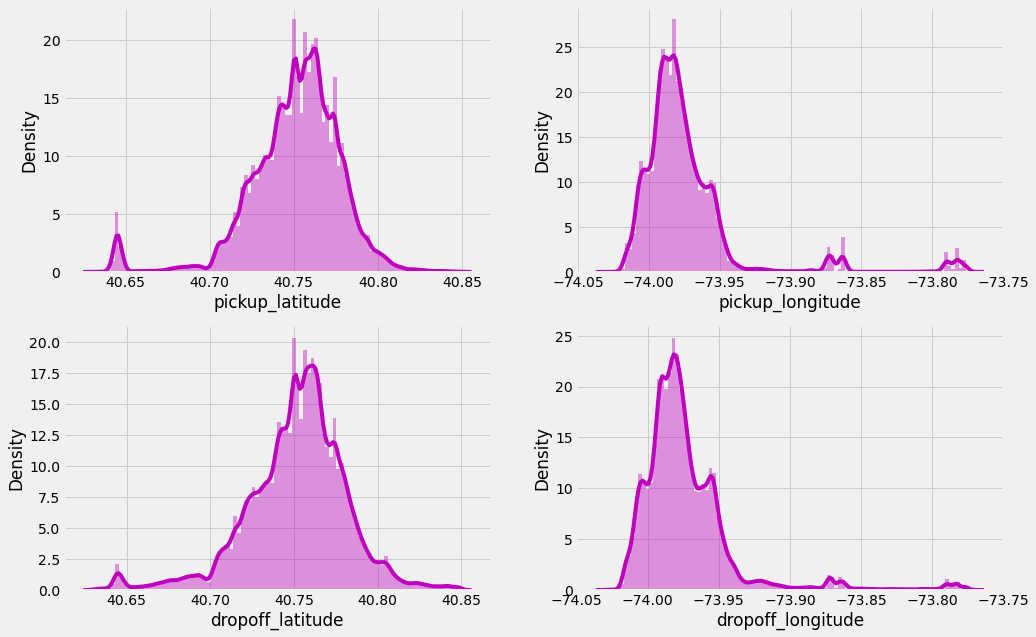

In [15]:
fig, axes = plt.subplots(2,2, figsize=(15,10))
sns.distplot(data['pickup_latitude'], label = 'pickup_latitude',color="m",bins = 100, ax=axes[0,0])
axes[0,0].set_xlabel('pickup_latitude')
sns.distplot(data['pickup_longitude'].values, label = 'pickup_longitude',color="m",bins =100, ax=axes[0,1])
axes[0,1].set_xlabel('pickup_longitude')
sns.distplot(data['dropoff_latitude'].values, label = 'dropoff_latitude',color="m",bins =100, ax=axes[1, 0])
axes[1,0].set_xlabel('dropoff_latitude')
sns.distplot(data['dropoff_longitude'].values, label = 'dropoff_longitude',color="m",bins =100, ax=axes[1, 1])
axes[1,1].set_xlabel('dropoff_longitude')
plt.show()

After excluding the outliers can see the density are concentrated within the city border limit. Now can see by plotting in the map

#### Ploting the rides

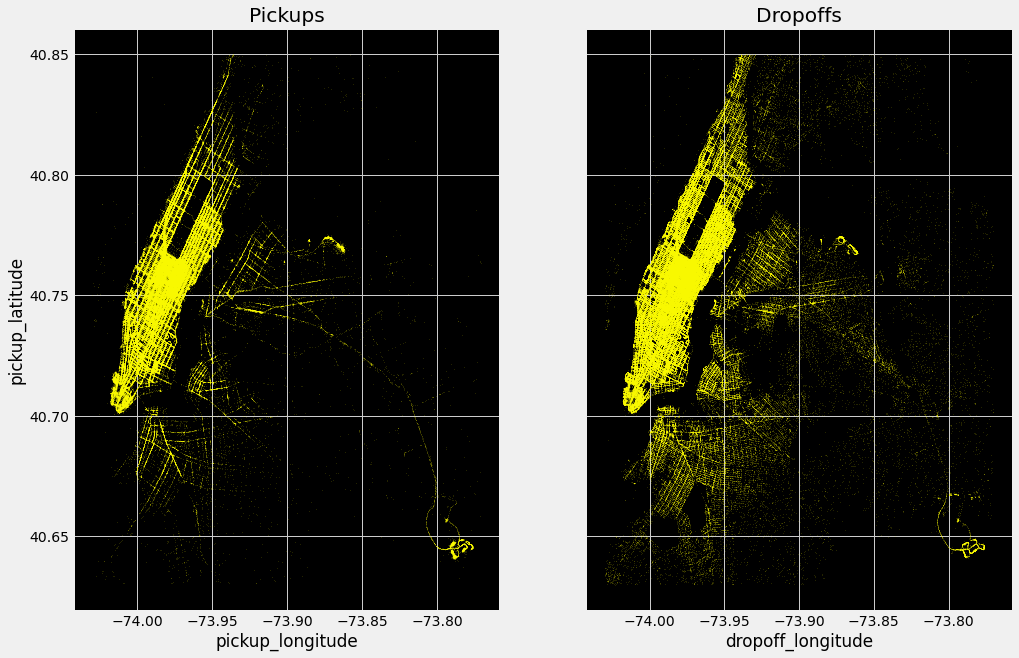

In [16]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,10))

data.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax1)
ax1.set_title("Pickups")
ax1.set_facecolor('black')

data.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax2)
ax2.set_title("Dropoffs")
ax2.set_facecolor('black') 

By plotting the pickup and dropoff coordinates can see the map of New York. It is evident from above plot that
1. Most of the journeys start and end at Manhattan which is more bright
2. Drop off are comparatively spread accross all over the city. Might be people taking cabs to their homes.
3. Both the airports seems to have more pickup and dropoff rides.

### Categorical features

#### Vendors

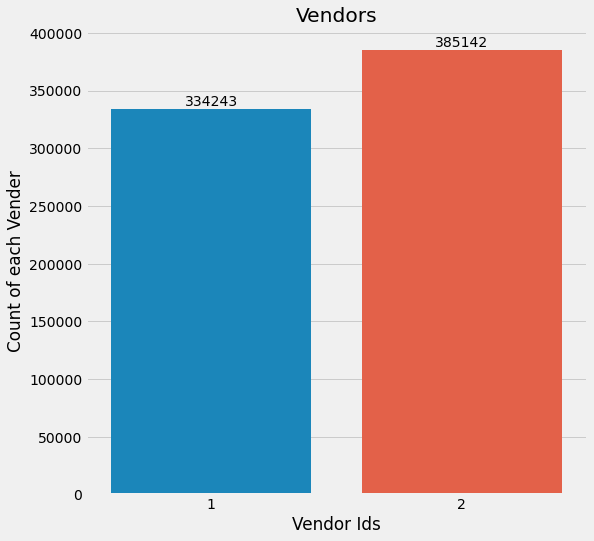

In [17]:
f, ax = plt.subplots(figsize=(8,8))
cplot = sns.countplot(data=data, x='vendor_id')
for count in cplot.patches:
    height = count.get_height()
    ax.annotate('{}'.format(height),xy=(count.get_x() + count.get_width()/2, height),
                    ha='center', va='bottom')
cplot.set_title("Vendors")
cplot.set_ylabel("Count of each Vender")
cplot.set_xlabel("Vendor Ids");

Only 2 vendors are there and out of them vendor 2 gets more number of rides

#### Store and forward flag

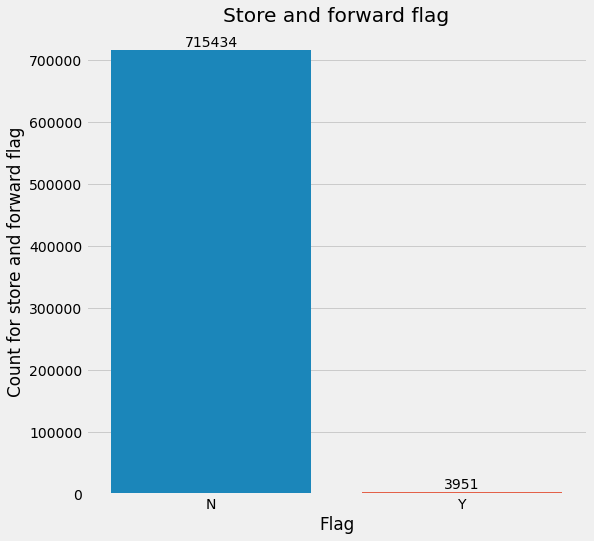

In [18]:
f, ax = plt.subplots(figsize=(8,8))
cplot = sns.countplot(data=data, x='store_and_fwd_flag')
for count in cplot.patches:
    height = count.get_height()
    ax.annotate('{}'.format(height),xy=(count.get_x() + count.get_width()/2, height),
                    ha='center', va='bottom')
cplot.set_title("Store and forward flag")
cplot.set_ylabel("Count for store and forward flag")
cplot.set_xlabel("Flag");

Almost all the rides are forwarded immediately to the vendors and only few rides are stored. 

#### Passenger count

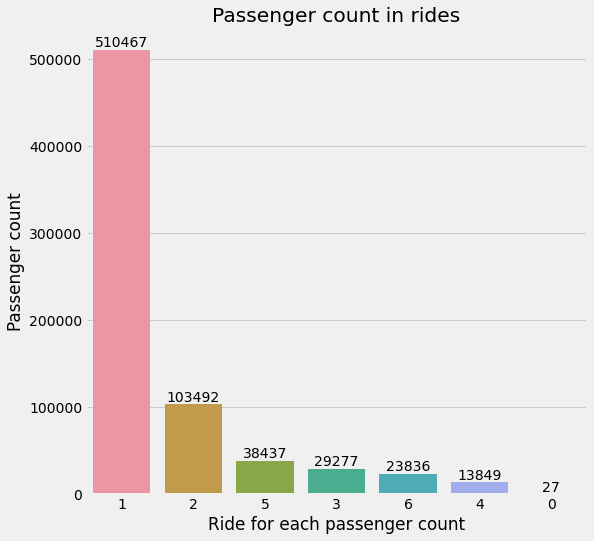

In [19]:
f, ax = plt.subplots(figsize=(8,8))
cplot = sns.countplot(data=data, x='passenger_count', order=data['passenger_count'].value_counts().index)
for count in cplot.patches:
    height = count.get_height()
    ax.annotate('{}'.format(height),xy=(count.get_x() + count.get_width()/2, height),
                    ha='center', va='bottom')
cplot.set_title("Passenger count in rides")
cplot.set_ylabel("Passenger count")
cplot.set_xlabel("Ride for each passenger count");

From above plot can infer that 
1. Most rides are single travel.
2. 27 trips are without any pasengers which should be outlier.

### Datetime features

#### Weekends vs Weekdays

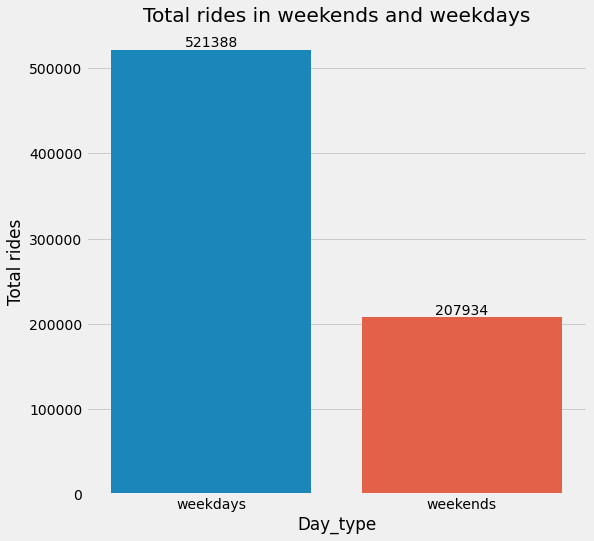

In [16]:
f, ax = plt.subplots(figsize=(8,8))
cplot = sns.countplot(data=data, x='day_type')
for count in cplot.patches:
    height = count.get_height()
    ax.annotate('{}'.format(height),xy=(count.get_x() + count.get_width()/2, height),
                    ha='center', va='bottom')
cplot.set_title("Total rides in weekends and weekdays")
cplot.set_ylabel("Total rides")
cplot.set_xlabel("Day_type");

As expected number of rides in weekdays are more than the weekends which can be due to the working population

#### Day of week

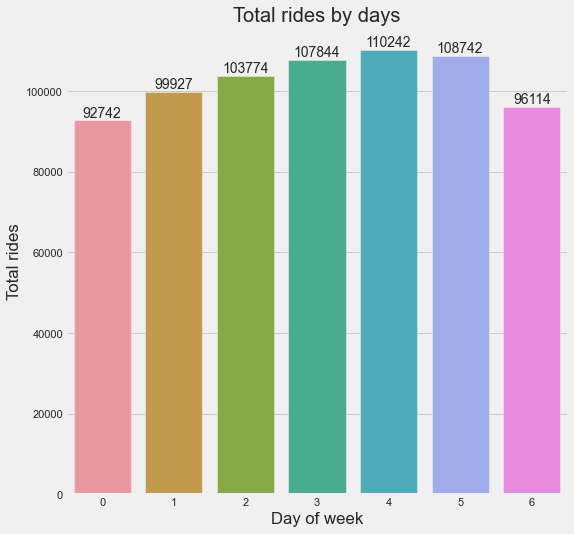

In [139]:
f, ax = plt.subplots(figsize=(8,8))
cplot = sns.countplot(data=data, x='day_of_week')
for count in cplot.patches:
    height = count.get_height()
    ax.annotate('{}'.format(height),xy=(count.get_x() + count.get_width()/2, height),
                    ha='center', va='bottom')
cplot.set_title("Total rides by days")
cplot.set_ylabel("Total rides")
cplot.set_xlabel("Day of week");

We get the highest number of rides on friday

#### Hour of the day

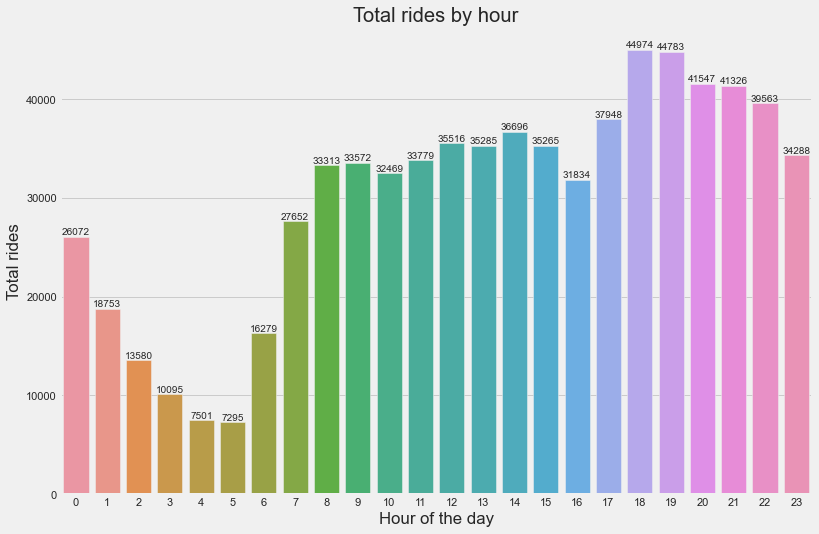

In [140]:
f, ax = plt.subplots(figsize=(12,8))
cplot = sns.countplot(data=data, x='hour')
for count in cplot.patches:
    height = count.get_height()
    ax.annotate('{}'.format(height),xy=(count.get_x() + count.get_width()/2, height),
                    ha='center', va='bottom', fontsize=10)
cplot.set_title("Total rides by hour")
cplot.set_ylabel("Total rides")
cplot.set_xlabel("Hour of the day");

From the above plot, can infer that,
1. Rides are more from 8am to 11pm.
2. Maximum rides are at 6pm and 7pm which can be due to most returning to home
3. Number of rides are minimum at mid night

#### Part of the day

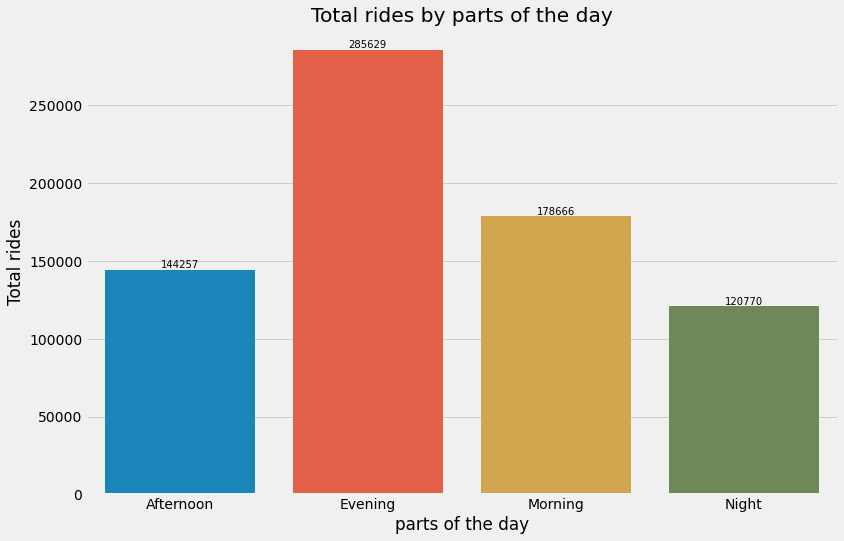

In [34]:
f, ax = plt.subplots(figsize=(12,8))
cplot = sns.countplot(data=data, x='Session')
for count in cplot.patches:
    height = count.get_height()
    ax.annotate('{}'.format(height),xy=(count.get_x() + count.get_width()/2, height),
                    ha='center', va='bottom', fontsize=10)
cplot.set_title("Total rides by parts of the day")
cplot.set_ylabel("Total rides")
cplot.set_xlabel("Parts of the day");

## Analysing the variables - Multivariate analysis

#### Trip duration vs Trip distance

Since there are more outliers in Trip duration, visualising it directly doesn't give the whole picture of the relationship

Text(0.5, 1.0, 'log of trip Duration vs Aerial trip Distance')

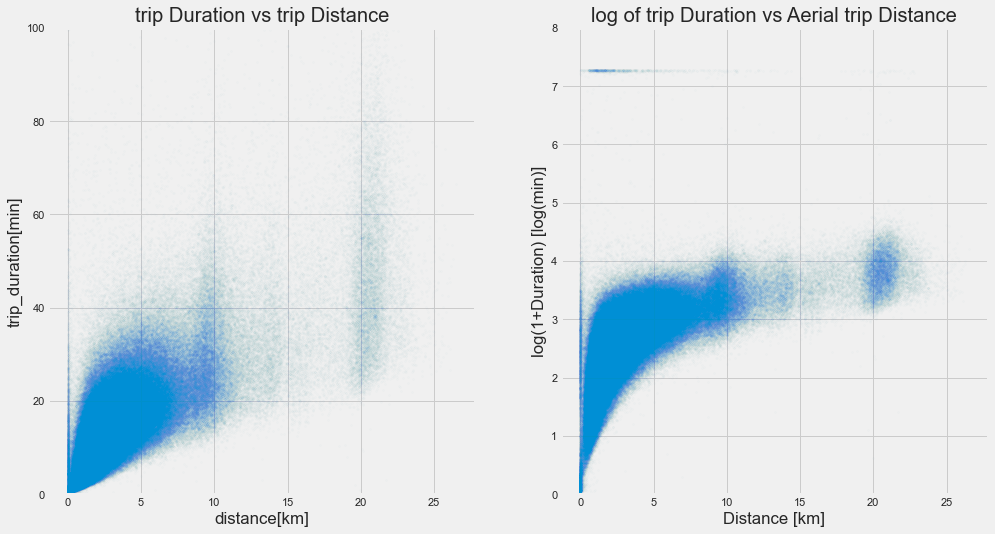

In [143]:
fig, axArray = plt.subplots(nrows=1,ncols=2,figsize=(15,8))
axArray[0].scatter(data['distance'], data['trip_duration(min)'], s=5,alpha=0.01); 
axArray[0].set_xlabel('distance[km]'); 
axArray[0].set_ylabel('trip_duration[min]')
axArray[0].set_ylim(0,100)
axArray[0].set_title('trip Duration vs trip Distance')

axArray[1].scatter(data['distance'], np.log(data['trip_duration(min)']+1),s=5,alpha=0.01); 
axArray[1].set_xlabel('Distance [km]') 
axArray[1].set_ylabel('log(1+Duration) [log(min)]')
axArray[1].set_ylim(0,8)
axArray[1].set_title('log of trip Duration vs trip Distance')

From the above plots can infer that as the distance increases, duration of the trip also increases. Since our trip is right skewed distribution, on checking with log transformed values, able to visualise the whole picture of the relationship.

But we have some 0 distance trips with more trip duration. Lets analyse those rides now

In [144]:
data[data.distance==0].head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration(min),hour,day_of_week,day_type,distance
324,id0786923,2,2016-03-26 13:34:38,2016-03-26 13:37:17,1,-73.996323,40.753460,-73.996323,40.753460,N,159,2.650000,13,5,weekends,0.0
787,id2323213,2,2016-06-13 16:49:52,2016-06-13 17:04:49,5,-73.967171,40.763500,-73.967171,40.763500,N,897,14.950000,16,0,weekdays,0.0
1163,id3235868,1,2016-02-29 21:39:52,2016-02-29 21:44:08,1,-73.995232,40.744038,-73.995232,40.744038,N,256,4.266667,21,0,weekdays,0.0
1243,id1865738,2,2016-03-13 11:38:36,2016-03-13 12:00:46,2,-73.912781,40.804428,-73.912781,40.804428,N,1330,22.166667,11,6,weekends,0.0
1498,id0582357,2,2016-04-29 17:58:34,2016-04-29 18:01:06,4,-73.988159,40.763802,-73.988159,40.763802,N,152,2.533333,17,4,weekdays,0.0


In [145]:
data[data.distance==0].tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration(min),hour,day_of_week,day_type,distance
718401,id2406002,1,2016-02-29 12:50:13,2016-02-29 12:59:41,1,-73.980171,40.760216,-73.980171,40.760216,N,568,9.466667,12,0,weekdays,0.0
718790,id3423342,2,2016-05-05 21:32:43,2016-05-05 21:32:57,2,-73.977898,40.766392,-73.977898,40.766392,N,14,0.233333,21,3,weekdays,0.0
718845,id2618105,2,2016-03-13 20:06:40,2016-03-13 20:14:24,1,-73.974258,40.759895,-73.974258,40.759895,N,464,7.733333,20,6,weekends,0.0
718907,id1232120,2,2016-05-29 04:04:32,2016-05-29 04:11:33,2,-73.984558,40.750839,-73.984558,40.750839,N,421,7.016667,4,6,weekends,0.0
719371,id3477255,2,2016-01-20 08:22:38,2016-01-20 08:47:35,1,-73.977859,40.749538,-73.977859,40.749538,N,1497,24.950000,8,2,weekdays,0.0


By looking at the ride details, can see that for all the 0 distance ride, dropoff time is more than pickup time. It can be due to 3 reasons.
1. Dropoff time is not recorded.
2. Taxi might have stuck in traffic jam and customer would have cancelled the ride.
3. Manual error.

#### Pickup and Dropoff locations

Can see the desnity of rides from the heatmap

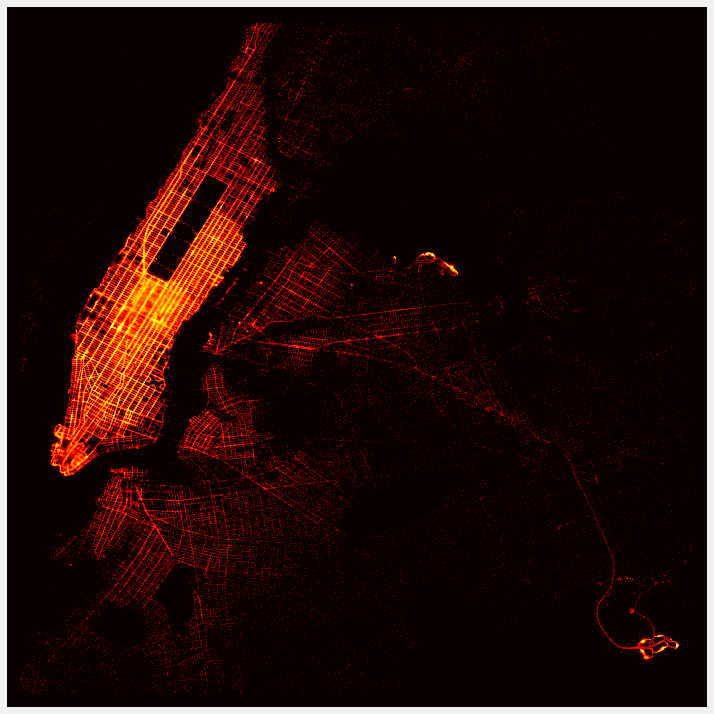

In [146]:
allLat  = np.array(list(data['pickup_latitude'])  + list(data['dropoff_latitude']))
allLong = np.array(list(data['pickup_longitude']) + list(data['dropoff_longitude']))
imageSize = (700,700)
th = 0.005
longRange = [min(allLong)-th, max(allLong)+th]        # [-74.03, -73.76] 
latRange = [min(allLat)-th, max(allLat)+th]            # [40.62,40.86]

allLatInds  = imageSize[0] - (imageSize[0] * (((allLat-latRange[0]))/(latRange[1] - latRange[0]))).astype(int)
allLongInds =                (imageSize[1] * (allLong - longRange[0])/(longRange[1] - longRange[0])).astype(int)

locationDensityImage = np.zeros(imageSize)
for latInd, longInd in zip(allLatInds,allLongInds):
    locationDensityImage[latInd,longInd] += 1

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(12,12))
ax.imshow(np.log(locationDensityImage+1),cmap='hot')
ax.set_axis_off()

#### Vendor based trips to and from airports

Since airport is one of the important place in the city, now will analyse the rides to and from it. First filter all the rides to and from both the airports

In [147]:
LaGuardia = {"maxLat": 40.76716, "minLong": -73.88695, "minLat": 40.764045, "maxLong": -73.86129}
JFK = {"minLat": 40.64477, "minLong": -73.79408, "maxLat": 40.64961, "maxLong": -73.78576}

# Filtering trips picked and dropped near the La Guardia airport
LAG_data1 = data[((data['pickup_longitude']>=LaGuardia['minLong']) & (data['pickup_longitude']<=LaGuardia['maxLong'])) & ((data['pickup_latitude']>=LaGuardia['minLat']) & (data['pickup_latitude']<=LaGuardia['maxLat']))]
LAG_data2 = data[((data['dropoff_longitude']>=LaGuardia['minLong']) & (data['dropoff_longitude']<=LaGuardia['maxLong']))&((data['dropoff_latitude']>=LaGuardia['minLat']) & (data['dropoff_latitude']<=LaGuardia['maxLat']))]
LAG_data = LAG_data1.merge(LAG_data2, how='outer')

# Filtering trips picked and dropped near the JF Kennedy airport
JFK_data1 = data[((data['pickup_longitude']>=JFK['minLong']) & (data['pickup_longitude']<=JFK['maxLong'])) & ((data['pickup_latitude']>=JFK['minLat']) & (data['pickup_latitude']<=JFK['maxLat']))]
JFK_data2 = data[((data['dropoff_longitude']>=JFK['minLong']) & (data['dropoff_longitude']<=JFK['maxLong']))&((data['dropoff_latitude']>=JFK['minLat']) & (data['dropoff_latitude']<=JFK['maxLat']))]
JFK_data = JFK_data1.merge(JFK_data2, how='outer')


print(f"Totally {LAG_data.shape[0]} and {JFK_data.shape[0]} rides are picked and dropped from La Guardia airport adn JF Kennedy airport")

Totally 92 and 3703 rides are picked and dropped from La Guardia airport adn JF Kennedy airport


Now can see the hourly ride count taken to and from both the airports

In [149]:
pd.crosstab(LAG_data.hour, LAG_data.vendor_id, LAG_data.id, aggfunc='count', normalize=True, margins=True, margins_name="Total")

vendor_id,1,2,Total
hour,,,
0,0.032609,0.054348,0.086957
1,0.043478,0.032609,0.076087
2,0.021739,0.010870,0.032609
3,0.000000,0.010870,0.010870
4,0.010870,0.000000,0.010870
5,0.032609,0.010870,0.043478
6,0.010870,0.000000,0.010870
8,0.021739,0.010870,0.032609
9,0.021739,0.000000,0.021739


In [32]:
pd.crosstab(JFK_data.hour, JFK_data.vendor_id, JFK_data.id, aggfunc='count', normalize=True, margins=True, margins_name="Total")

vendor_id,1,2,Total
hour,,,
0,0.013503,0.021604,0.035107
1,0.008102,0.010532,0.018634
2,0.003781,0.003511,0.007291
3,0.001620,0.003511,0.005131
4,0.005941,0.008102,0.014043
5,0.012422,0.016473,0.028895
6,0.016743,0.024305,0.041048
7,0.020254,0.026195,0.046449
8,0.016203,0.019444,0.035647


From above tables, can infer that almost both the vendors have similar amount of rides to the airport.

### Hourly trip distribution to and from airport

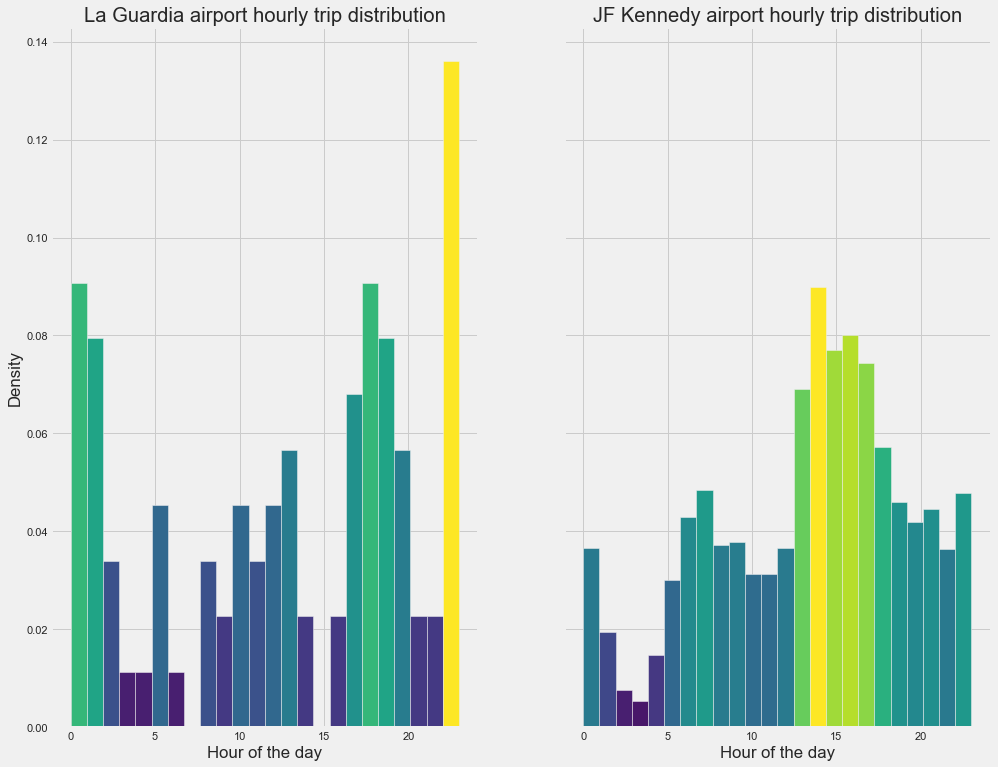

In [150]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,12))

n, bins, patches_LAG = ax1.hist(LAG_data.hour, bins=24, density=True, linewidth=0.5)
ax1.set_title("La Guardia airport hourly trip distribution")
ax1.set_xlabel("Hour of the day")
ax1.set_ylabel("Density")
for i in range(len(patches_LAG)):
    patches_LAG[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))
    
n, bins, patches_JFK = ax2.hist(JFK_data.hour, bins=24, density=True, linewidth=0.5)
ax2.set_title("JF Kennedy airport hourly trip distribution")
ax2.set_xlabel("Hour of the day")

for i in range(len(patches_JFK)):
    patches_JFK[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))

f.show()

Yellow and light green shades say the high density of rides in hourly basis. In La Guardia airport, can see from 5 pm to 2 am more rides are taken. In JF Kennedy airport, from 1 pm to 7 pm more rides are taken.

### Trips to and from Manhattan:

Manhattan has most number of rides which can be visualised from the heatmap shown above. Now filter the trips started and ended from manhattan and analyse them.

In [151]:
def within_manhattan(row, polygon):

    if Polygon(polygon).contains(Point(row["pickup_latitude"], row["pickup_longitude"])):
        return 'picked'
    elif Polygon(polygon).contains(Point(row["dropoff_latitude"], row["dropoff_longitude"])):
        return 'dropped'
    return 'NA'

Tuples in polygon list is the boundary coordinates of the manhattan

In [153]:
polygon = [(40.876939938199065, -73.92630288034404), (40.86913757064833, -73.90996543261298), (40.79345029326196, -73.91569787041335), (40.71137636877774, -73.97904130850333), (40.70529278904752, -74.01888175121593)]
data["within_manhattan"] = data.apply(lambda row: within_manhattan(row, polygon), axis = 1)
manhattan_trips = data[(data['within_manhattan']=='picked')|(data['within_manhattan']=='dropped')]
pickups = manhattan_trips[manhattan_trips['within_manhattan']=='picked']
dropoffs = manhattan_trips[manhattan_trips['within_manhattan']=='dropped']

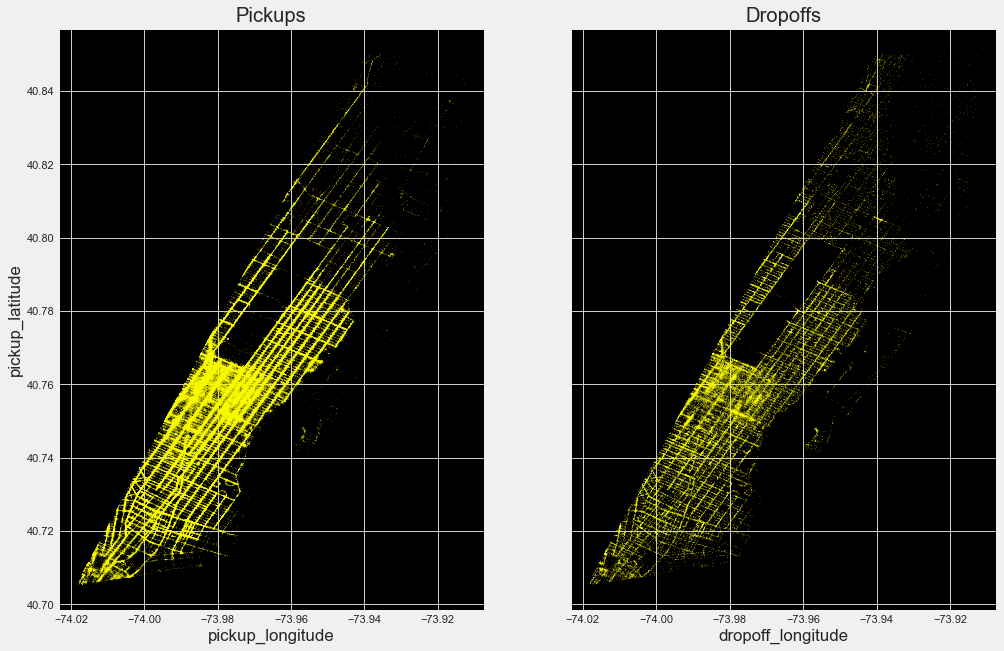

In [156]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,10))

pickups.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax1)
ax1.set_title("Pickups")
ax1.set_facecolor('black')

dropoffs.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax2)
ax2.set_title("Dropoffs")
ax2.set_facecolor('black') 

From above plots can see that, number of pickups are more than dropoffs in manhattan

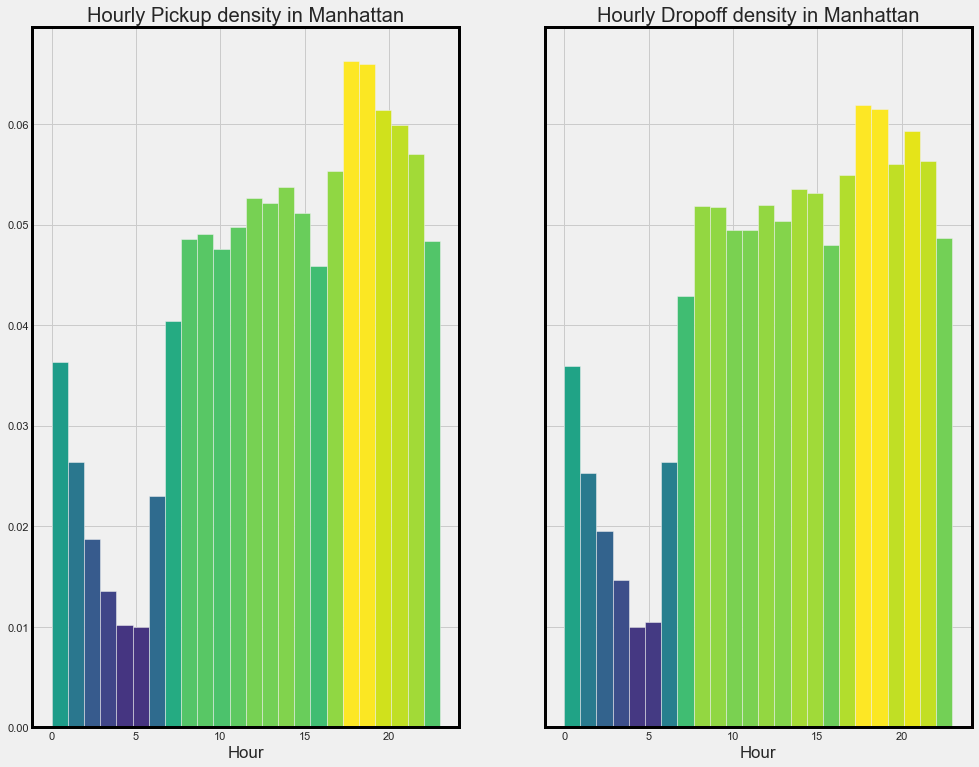

In [157]:
f, axes = plt.subplots(1, 2, sharey=True,figsize=(15,12))

n, bins, patches_pickups = axes[0].hist(pickups.hour, bins=24, density=True, linewidth=0.5)
axes[0].set_title("Hourly Pickup density in Manhattan")
axes[0].set_xlabel('Hour')

for i in range(len(patches_pickups)):
    patches_pickups[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))
    
n, bins, patches_dropoffs = axes[1].hist(dropoffs.hour, bins=24, density=True, linewidth=0.5)
axes[1].set_title("Hourly Dropoff density in Manhattan")
axes[1].set_xlabel('Hour')

for i in range(len(patches_dropoffs)):
    patches_dropoffs[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))

for ax in axes:
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        
f.show()

From above plot can infer that pick and dropoff are more from 7am to 11pm. This is because Manhattan is a busy business centre

### Trip duration vs Days based on vendors

Since there are some outliers, can visualise the trip duration column till 95th percentile to give some better idea about the distribution

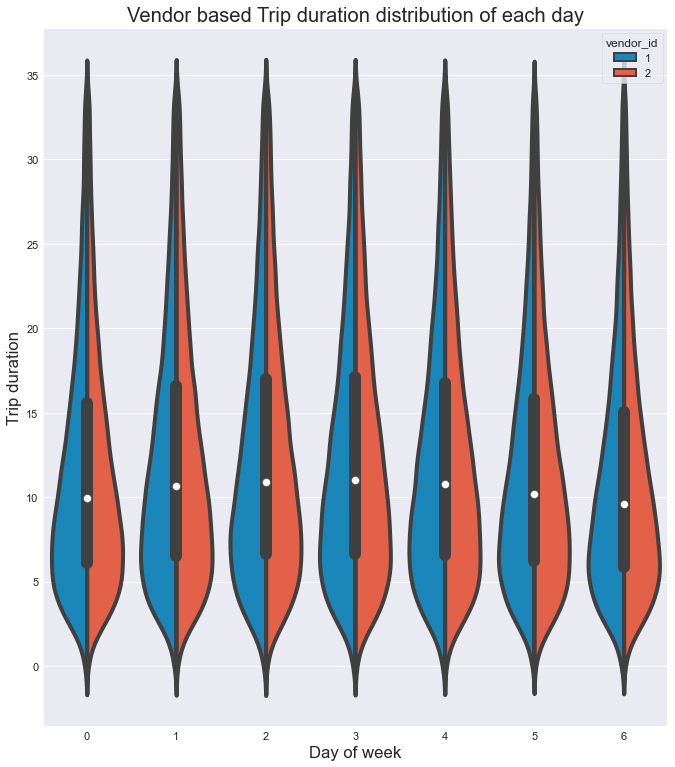

In [158]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,12))
sns.violinplot(data=data[data['trip_duration(min)']<=data['trip_duration(min)'].quantile(0.95)],x='day_of_week', y='trip_duration(min)', hue='vendor_id', split=True)
ax.set_xlabel("Day of week")
ax.set_ylabel("Trip duration")
ax.set_title("Vendor based Trip duration distribution of each day");

From the above figure can infer that, 
1. From the distribution, both the vendors has almost similar duration distribution in each day
2. Also for each day, duration between most number of rides have 5 to 10 mins duration with each vendor

Can verify the same with the lineplot

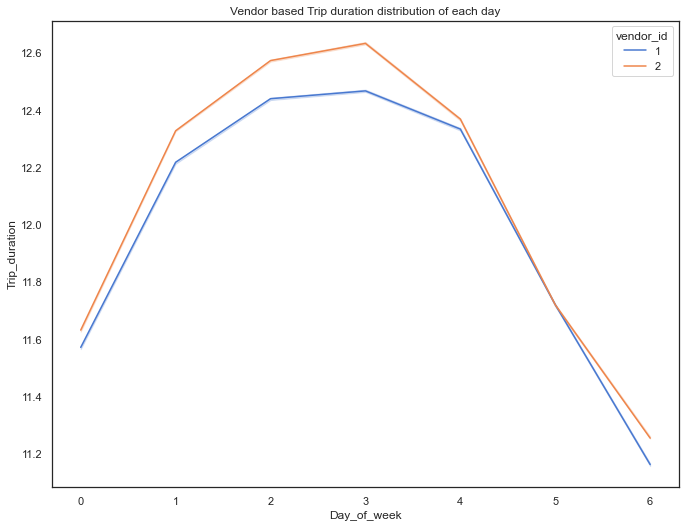

In [159]:
sns.set(style="white", palette="muted", color_codes=True)
plt.figure(figsize=(10,8))
sns.lineplot(data=data[data['trip_duration(min)']<=data['trip_duration(min)'].quantile(0.95)],x='day_of_week', y='trip_duration(min)', hue='vendor_id',ci=10)
plt.xlabel('Day_of_week')
plt.ylabel('Trip_duration')
plt.title('Vendor based Trip duration distribution of each day');

From the above plot, its clear that both the vendors take almost similar time in all days except wednesday and thrusday

### Vendor based trips in a hour distribution of each day

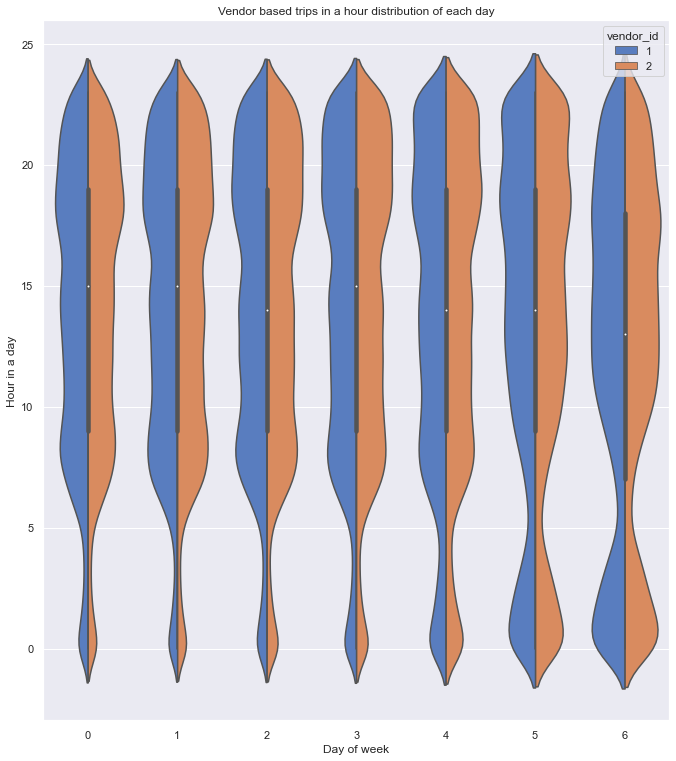

In [160]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,12))
sns.violinplot(data=data,x='day_of_week', y='hour', hue='vendor_id', split=True)
ax.set_xlabel("Day of week")
ax.set_ylabel("Hour in a day")
ax.set_title("Vendor based trips in a hour distribution of each day");

From the plot, can confirm that,
1. Here also both the vendors has almost similar disctribution of rides
2. Number of rides started to increase at around 7am
3. On Saturday and Sunday, can see the increase in rides early in the morning which can be due to the late night parties.

### Vendor based trip duration vs passenger_count

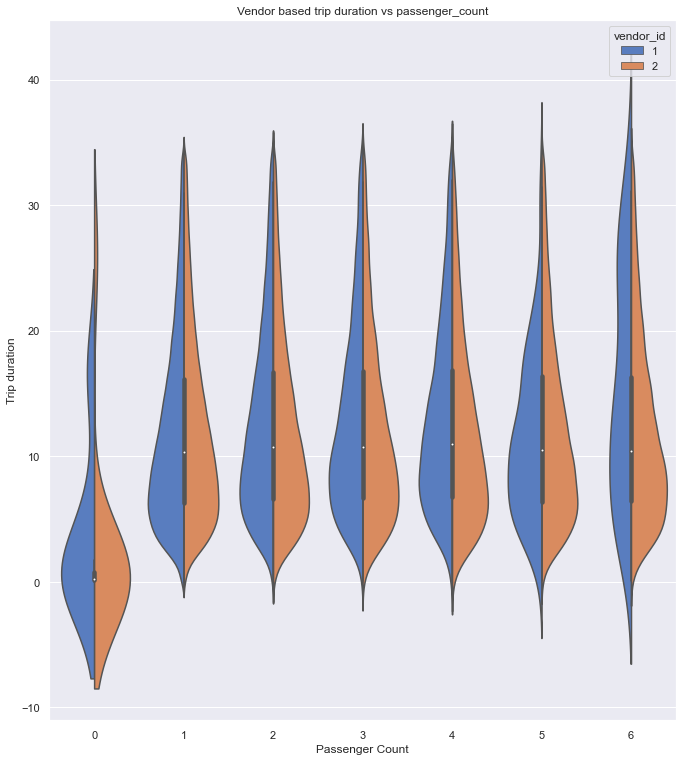

In [161]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,12))
sns.violinplot(data=data[data['trip_duration(min)']<=data['trip_duration(min)'].quantile(0.95)],x='passenger_count', y='trip_duration(min)', hue='vendor_id', split=True)
ax.set_xlabel("Passenger Count")
ax.set_ylabel("Trip duration")
ax.set_title("Vendor based trip duration vs passenger_count");

From above plot, can confirm that,
1. Both vendors have almost similar distribution but vendor 2 has larger trip duration on monday and vendor 1 has larger trip durations on sunday
2. Both the vendors have zero trip duration rides.
3. Negative values for trip duration might be the outliers.
4. On monday, mean trip duration is very low

### Hourly trip durations for each day 

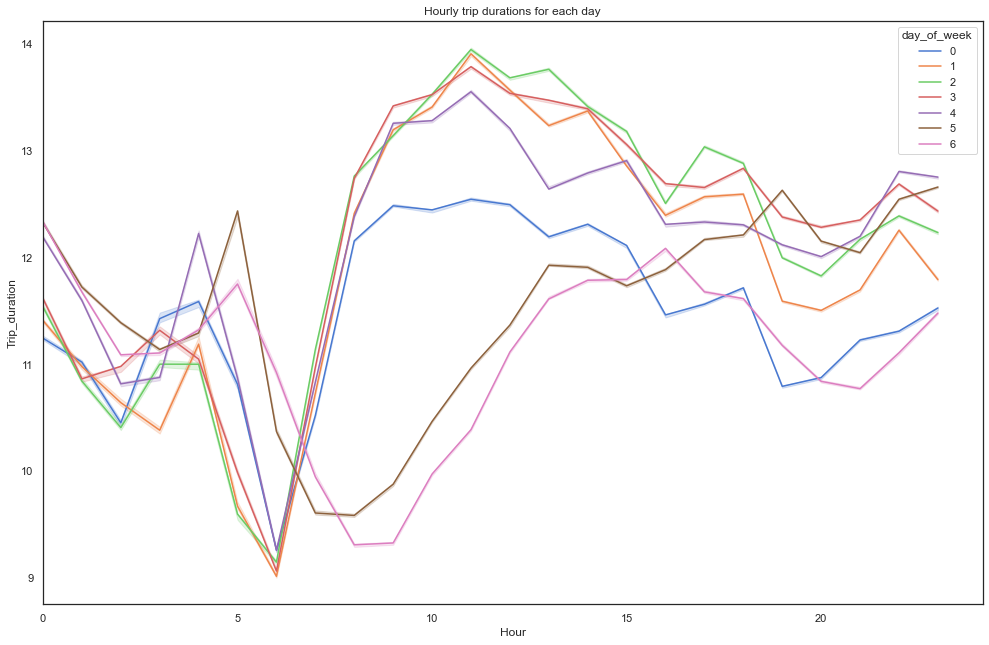

In [162]:
plt.figure(figsize=(15,10))
sns.set(style="white", palette="muted", color_codes=True)
sns.lineplot(data=data[data['trip_duration(min)']<=data['trip_duration(min)'].quantile(0.95)],x='hour', y='trip_duration(min)', hue='day_of_week',ci=10)
plt.xlabel('Hour')
plt.ylabel('Trip_duration')
plt.xlim(0,None)
plt.title('Hourly trip durations for each day');

From above plot, can infer that,
1. Trip duration started to increase steeply after 6am in weekdays and in weekends it started to raise gradually after 9am.
2. In  weekdays, duration started to decrease in mid night but there is peak during weekends which can be due to late night parties.
3. In weekdays after 10am, trip duration is almost same for all days

#### Weekend vs Weekday pick and drop locations

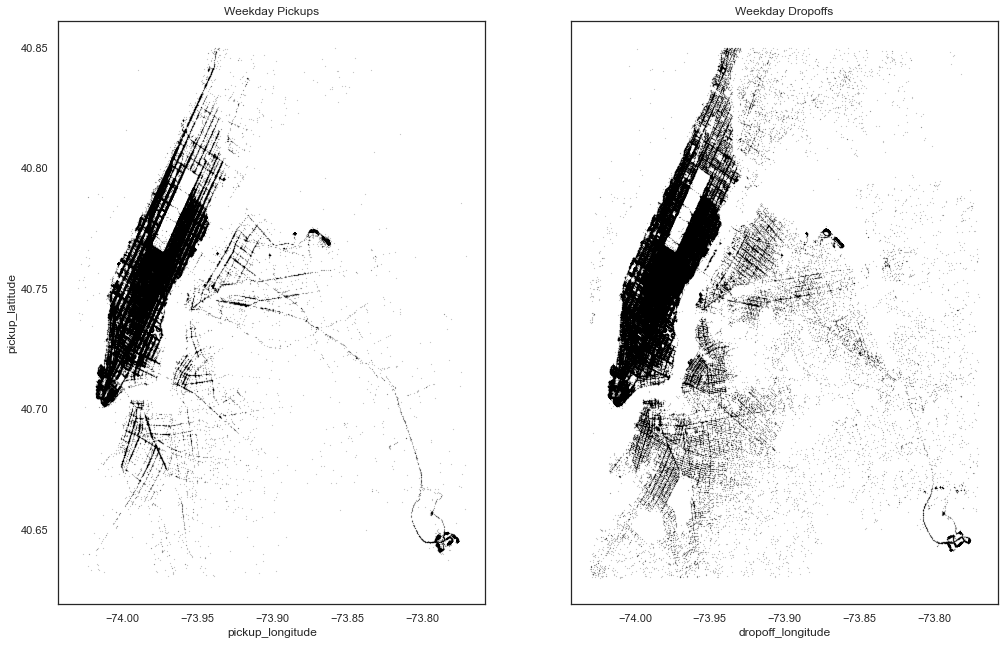

In [163]:
weekday = data[data['day_type']=='weekdays']
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,10))

weekday.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',
                color='black', 
                s=.02, alpha=.6, subplots=True, ax=ax1)
ax1.set_title("Weekday Pickups")
ax1.set_facecolor('white')

weekday.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude',
                color='black', 
                s=.02, alpha=.6, subplots=True, ax=ax2)
ax2.set_title("Weekday Dropoffs")
ax2.set_facecolor('white') 

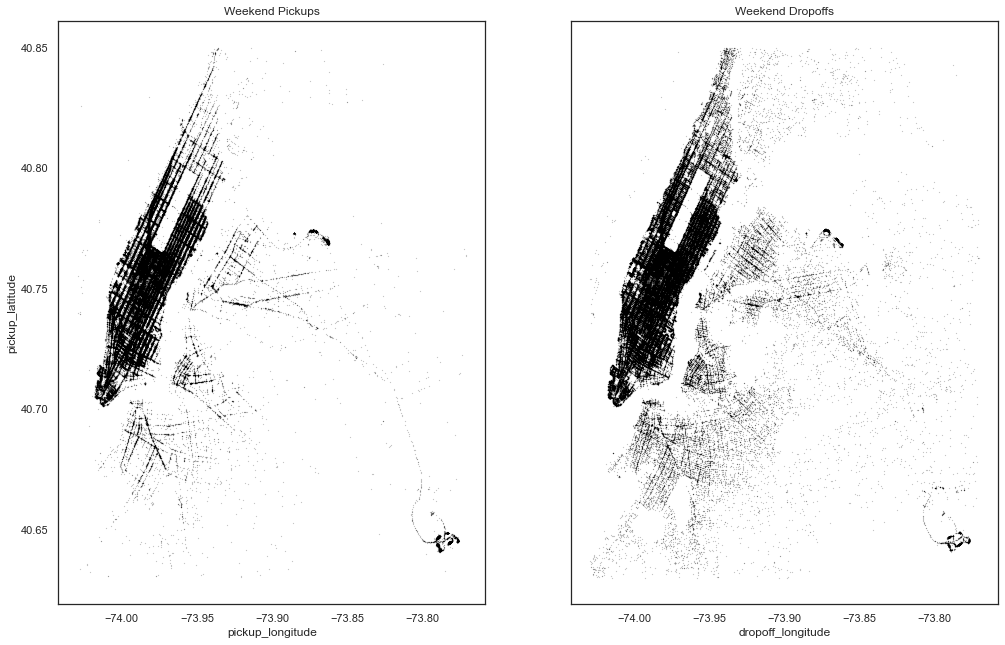

In [164]:
weekend = data[data['day_type']=='weekends']
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,10))

weekend.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',
                color='black', 
                s=.02, alpha=.6, subplots=True, ax=ax1)
ax1.set_title("Weekend Pickups")
ax1.set_facecolor('white')

weekend.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude',
                color='black', 
                s=.02, alpha=.6, subplots=True, ax=ax2)
ax2.set_title("Weekend Dropoffs")
ax2.set_facecolor('white') 

From above plots, can see that 
1. Pickup and drop off density is almost similar for both weekdays and weekends.
2. Density during weekdays is more than weekends which can be due to holidays.
3. Droppoffs are spread across the city which can be due to people returning to homes

Now lets try to visualise the same with different sessions of the day

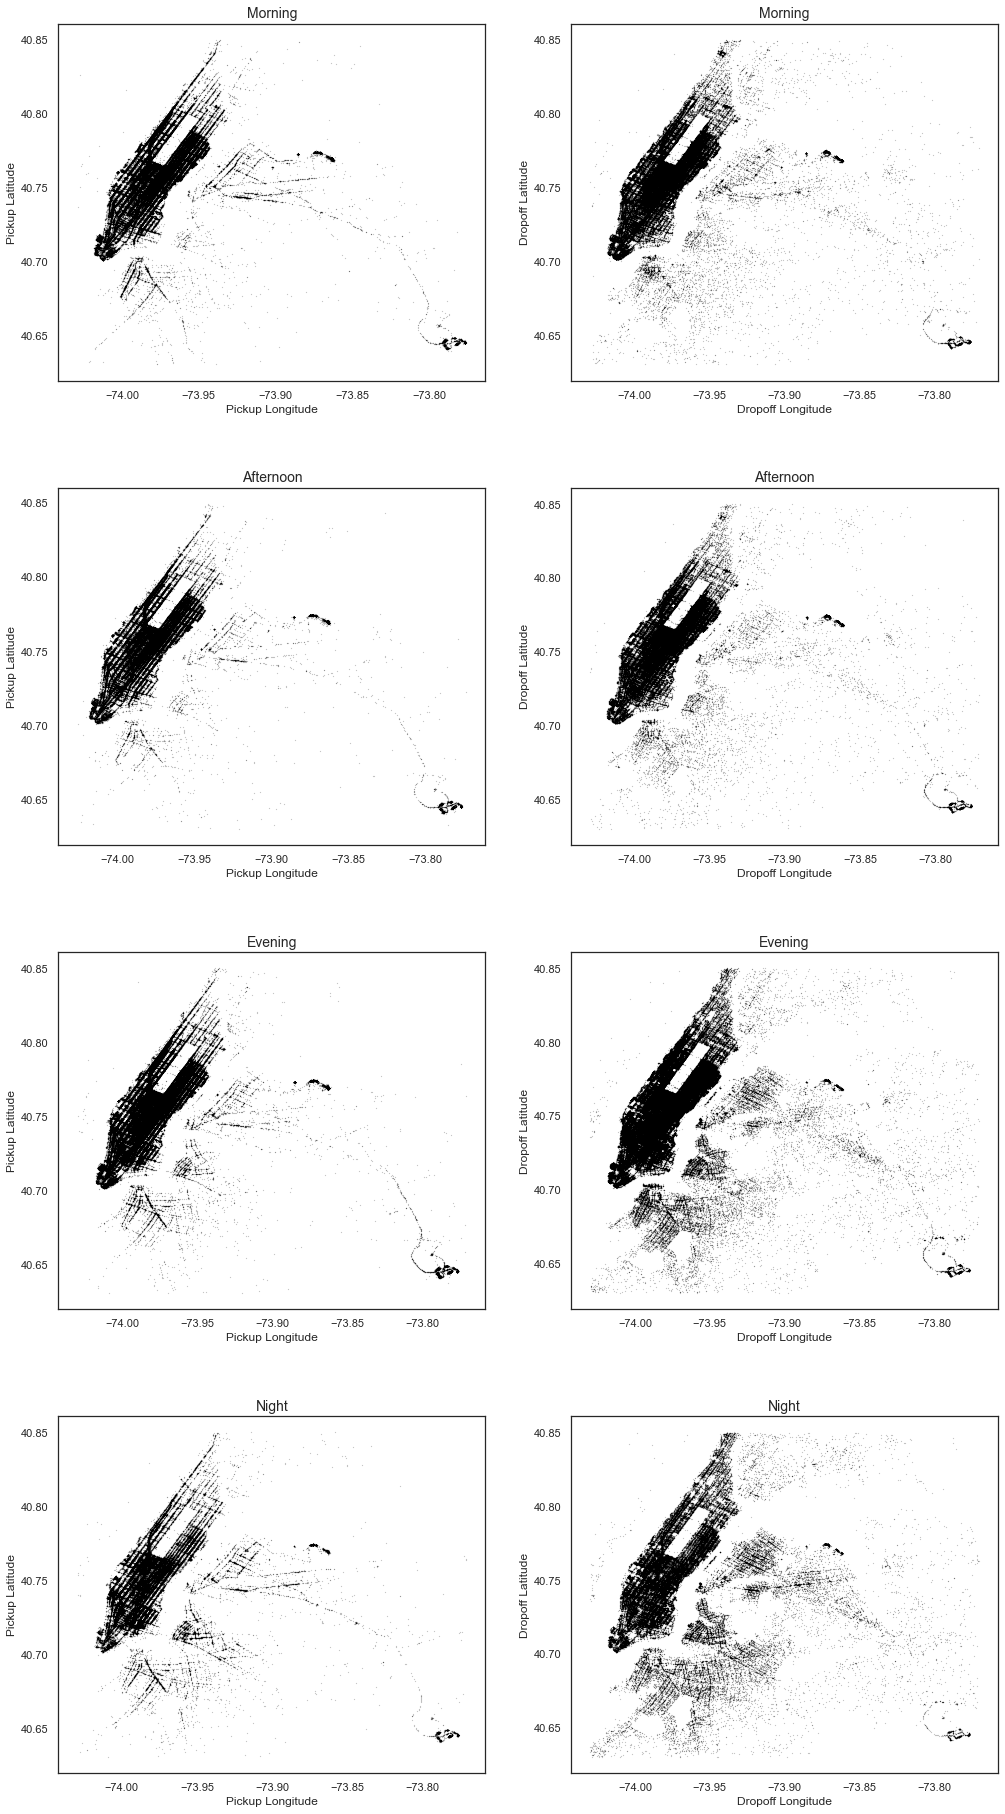

In [167]:
sessions = ['Morning', 'Afternoon', 'Evening', 'Night']
fig, ax = plt.subplots(nrows=len(sessions), ncols = 2, figsize=(15,30))
fig.subplots_adjust(hspace=0.3)
for i, session in enumerate(sessions):
    ses = data[data['Session']==session]
    ses.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',
                color='black', s=.02, alpha=.6, subplots=True, ax=ax[i,0])
    ax[i,0].set_xlabel('Pickup Longitude')
    ax[i,0].set_ylabel('Pickup Latitude')
    ax[i,0].set_title(session,fontdict={'fontsize': 14.0})
    ses.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude',
                color='black', s=.02, alpha=.6, subplots=True, ax=ax[i,1])
    ax[i,1].set_xlabel('Dropoff Longitude')
    ax[i,1].set_ylabel('Dropoff Latitude')
    ax[i,1].set_title(session,fontdict={'fontsize': 14.0})

From above plots, can confirm that
1. Dropoff density is more in Manhattan area in day time than night.
2. Pickup density is more in manhattan during evening.
3. The dropoff density is spread across the city more during evening and night time.
4. Pickup and dropoff looks constant in both the airports in all the plots.